# Wilcoxon statistics

In [5]:
import numpy as np
from scipy.stats import wilcoxon
import pandas as pd

## get result data

In [6]:
def readCSV(file_path):
    column_names = ['index', 'eps', 
                    'oliva_type', 'oliva_time', 'oliva_visit', 'oliva_status', 
                    'base_type', 'base_time', 'base_visit', 'base_status', 
                    'ab_type', 'ab_status', 'ab_time']
    dataframe = pd.read_csv(file_path, sep=",", header=None, names=column_names)
    return dataframe

## calculate p-value

In [7]:
# certified
def getPValue_safe(file_path):
    df = readCSV(file_path)
    df_safe_ob = df[(df.oliva_status == 'safe') & (df.base_status == 'safe')]
    df_safe_oa = df[(df.oliva_status == 'safe') & (df.ab_status == 'safe')]
    df_safe_ba = df[(df.base_status == 'safe') & (df.ab_status == 'safe')]

    p_value_list = []

    stat, p_value = wilcoxon(df_safe_ob.oliva_time, df_safe_ob.base_time)
    p_value_list.append("{:.2e}".format(p_value))
    stat, p_value = wilcoxon(df_safe_oa.oliva_time, df_safe_oa.ab_time)
    p_value_list.append("{:.2e}".format(p_value))
    tat, p_value = wilcoxon(df_safe_ba.base_time, df_safe_ba.ab_time)
    p_value_list.append("{:.2e}".format(p_value))
    return p_value_list

# not certified
def getPValue_nosafe(file_path):
    df = readCSV(file_path)
    df_nosafe_ob = df[(df.oliva_status != 'safe') & (df.base_status != 'safe')]
    df_nosafe_oa = df[(df.oliva_status != 'safe') & (df.ab_status != 'safe')]
    df_nosafe_ba = df[(df.base_status != 'safe') & (df.ab_status != 'safe')]

    p_value_list = []

    stat, p_value = wilcoxon(df_nosafe_ob.oliva_time, df_nosafe_ob.base_time)
    p_value_list.append("{:.2e}".format(p_value))
    stat, p_value = wilcoxon(df_nosafe_oa.oliva_time, df_nosafe_oa.ab_time)
    p_value_list.append("{:.2e}".format(p_value))
    tat, p_value = wilcoxon(df_nosafe_ba.base_time, df_nosafe_ba.ab_time)
    p_value_list.append("{:.2e}".format(p_value))
    return p_value_list

## calculate Median Of Differences

In [8]:
# certified
def getMOD_safe(file_path):
    df = readCSV(file_path)
    df_safe_ob = df[(df.oliva_status == 'safe') & (df.base_status == 'safe')]
    df_safe_oa = df[(df.oliva_status == 'safe') & (df.ab_status == 'safe')]
    df_safe_ba = df[(df.base_status == 'safe') & (df.ab_status == 'safe')]

    median_of_differences_list =  []

    differences = np.subtract(df_safe_ob.oliva_time, df_safe_ob.base_time)
    median_of_differences = np.median(differences)
    median_of_differences_list.append(round(median_of_differences, 2))
    differences = np.subtract(df_safe_oa.oliva_time, df_safe_oa.ab_time)
    median_of_differences = np.median(differences)
    median_of_differences_list.append(round(median_of_differences, 2))
    differences = np.subtract(df_safe_ba.base_time, df_safe_ba.ab_time)
    median_of_differences = np.median(differences)
    median_of_differences_list.append(round(median_of_differences, 2))

    return median_of_differences_list

# not certified
def getMOD_nosafe(file_path):
    df = readCSV(file_path)
    df_nosafe_ob = df[(df.oliva_status != 'safe') & (df.base_status != 'safe')]
    df_nosafe_oa = df[(df.oliva_status != 'safe') & (df.ab_status != 'safe')]
    df_nosafe_ba = df[(df.base_status != 'safe') & (df.ab_status != 'safe')]

    median_of_differences_list =  []

    differences = np.subtract(df_nosafe_ob.oliva_time, df_nosafe_ob.base_time)
    median_of_differences = np.median(differences)
    median_of_differences_list.append(round(median_of_differences, 2))
    differences = np.subtract(df_nosafe_oa.oliva_time, df_nosafe_oa.ab_time)
    median_of_differences = np.median(differences)
    median_of_differences_list.append(round(median_of_differences, 2))
    differences = np.subtract(df_nosafe_ba.base_time, df_nosafe_ba.ab_time)
    median_of_differences = np.median(differences)
    median_of_differences_list.append(round(median_of_differences, 2))

    return median_of_differences_list

## get data for table

In [9]:
def getData():
    file_lists = [
        'mnistl2',
        'mnistl4',
        'oval21_base',
        'oval21_deep',
        'oval21_wide'
    ]

    p_values_safe = []
    p_values_nosafe = []
    median_of_differences_safe = []
    median_of_differences_nosafe = []

    for file_name in file_lists:
        file_path = f'{file_name}.csv'
        p_values_safe.append(getPValue_safe(file_path))
        p_values_nosafe.append(getPValue_nosafe(file_path))
        median_of_differences_safe.append(getMOD_safe(file_path))
        median_of_differences_nosafe.append(getMOD_nosafe(file_path))
    
    return p_values_safe, p_values_nosafe, median_of_differences_safe, median_of_differences_nosafe
    

## get table

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def getTable():
    model_lists = [
        '$\mathdefault{MNIST_{L2}}$', '$\mathdefault{MNIST_{L4}}$',
        '$\mathdefault{OVAL21_{BASE}}$', '$\mathdefault{OVAL21_{DEEP}}$', 
        '$\mathdefault{OVAL21_{WIDE}}$'
    ]
    comparison_target = [
        'Oliva & BaB-baseline',
        'Oliva & αβ-crown',
        'BaB-baseline & αβ-crown'
    ]

    p_values_safe, p_values_nosafe, median_of_differences_safe, median_of_differences_nosafe = getData()

    table_data = []

    # certified
    for model_num, model_name in enumerate(model_lists):
        for target_num, target in enumerate(comparison_target):
            table_data.append([
                'CERTIFIED' if model_num == 0 and target_num == 0 else '',  # show on top line
                model_name if target_num == 0 else '',  # show model name on top line
                target, p_values_safe[model_num][target_num], 'Yes' if float(p_values_safe[model_num][target_num]) < 0.0025 else 'No', median_of_differences_safe[model_num][target_num]
            ])

    # not certified
    for model_num, model_name in enumerate(model_lists):
        for target_num, target in enumerate(comparison_target):
            table_data.append([
                'Not CERTIFIED' if model_num == 0 and target_num == 0 else '',  
                model_name if target_num == 0 else '',
                target, p_values_nosafe[model_num][target_num], 'Yes' if float(p_values_nosafe[model_num][target_num]) < 0.0025 else 'No', median_of_differences_nosafe[model_num][target_num]
            ])

    # figure
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.axis('tight')
    ax.axis('off')

    # column header
    column_labels = ["Verification status", "Models", "Comparison Target", "P-value", "Is the Difference\nSignificant\n(p-Value < 0.025)?", "Median of Differences\n(s)"]

    # make table
    table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

    # table style
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    # header cell
    header_cells = table[0, 4]
    header_cells.set_fontsize(10)
    for col in range(len(column_labels)):
        table[(0, col)].set_text_props(va='bottom')  # vartical bottom

    # horizontal left
    for i in range(len(table_data) + 1):
        table[(i, 2)].set_text_props(ha="left")

    # color setting
    colors = ['#f0f0f0', 'white'] 

    # remove grid
    for key, cell in table.get_celld().items():
        cell.set_linewidth(0)

        # background color
        if key[0] > 0:  # exclude header
            if key[0] % 2 == 1:
                cell.set_facecolor('#f0f0f0')
        # column(verification status)
        if key[0] > 0 and key[1] == 0:
            if 1 <= key[0] <= 15:
                cell.set_facecolor('#f0f0f0')
            elif 16 <= key[0] <= 30:
                cell.set_facecolor('white')
        # column(models)
        if key[0] > 0 and key[1] == 1:
            cell.set_facecolor(colors[(key[0] - 1) // 3 % 2])


    plt.savefig(f'table_wilcoxon.png', bbox_inches='tight')
    plt.show()

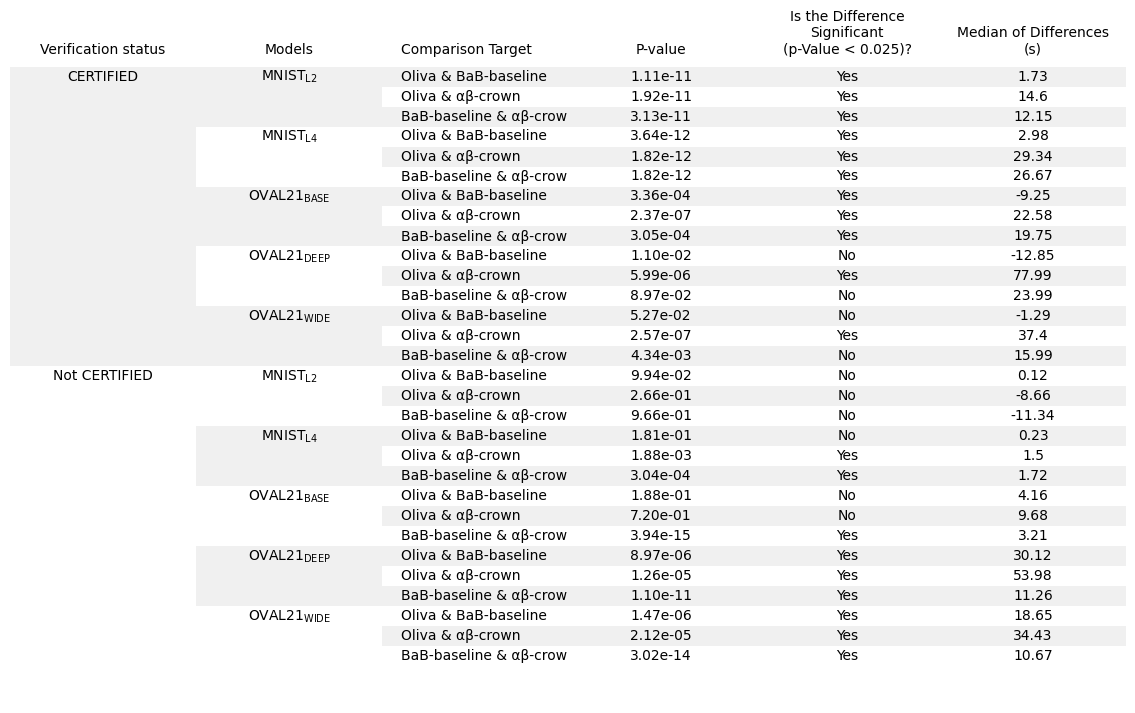

In [11]:
getTable()